In [1]:
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('C:\\Users\\bhoom\\Desktop\\garments_worker_productivity.csv')

In [3]:
df.shape

(1197, 15)

In [4]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [5]:
df.describe(include=['O'])

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [9]:
df['wip'].fillna(int(df['wip'].mean()), inplace=True)

In [10]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [11]:
from scipy.stats.mstats import normaltest
normaltest(df.actual_productivity.values)

NormaltestResult(statistic=107.39744323539699, pvalue=4.774649719927104e-24)

<AxesSubplot:>

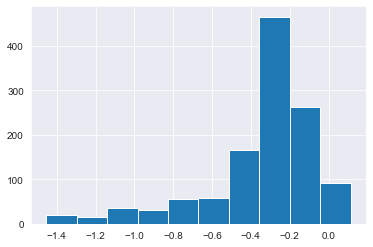

In [12]:
log_price = np.log(df.actual_productivity)
log_price.hist()

(array([ 97.,  76., 131., 171., 365., 132., 115.,  98.,   8.,   4.]),
 array([-0.46331654, -0.40417927, -0.34504199, -0.28590472, -0.22676745,
        -0.16763018, -0.10849291, -0.04935564,  0.00978163,  0.0689189 ,
         0.12805617]),
 <BarContainer object of 10 artists>)

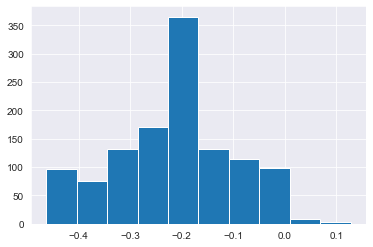

In [13]:
from scipy.stats import boxcox
bc_price= boxcox(df.actual_productivity)
boxcox_price = bc_price[0]
lambd = bc_price[1]
plt.hist(boxcox_price) 

In [14]:
normaltest(boxcox_price)

NormaltestResult(statistic=12.240154206943389, pvalue=0.0021982864609900953)

In [15]:
data=df.copy()

In [16]:
le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])


X=data[['targeted_productivity', 'team','smv','idle_men', 'no_of_style_change']]
y=data['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


s = StandardScaler()
X_train_sm = s.fit_transform(X_train)

mlr = LinearRegression()
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [17]:
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))

R2 score is -2.4045474314511512
Residual sum of squares (MSE): 0.02


In [18]:
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

Co-efficients are [ 0.0705507  -0.03090288 -0.01399105 -0.02763367 -0.01446043]
Intercept is 0.7342287210525688


In [21]:
import pickle
pickle.dump(mlr, open('C:\\Users\\bhoom\\Desktop\\model.pkl', 'wb'))

In [25]:
from flask import Flask, jsonify, request
import pickle
import json
data = {'date':0,'quarter':0, 'department': 0,'day': 0, 'team':0,
        'targeted_productivity':0,'smv':0,'wip':0, 'over_time': 0,
        'incentive':0, 'idle_time':0,'idle_men':0, 'no_of_style_change':0,
        'no_of_workers':0,'actual_productivity':0}
data = json.dumps(data)

In [26]:
url = 'http://127.0.0.1:8080'

In [29]:
from flask import Flask, jsonify, request
req=request.post(url, data)
print(req)

RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request.  Consult the documentation on testing for
information about how to avoid this problem.